## Third View: Minimal Average Variance of Derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, shgo, dual_annealing

# 提供的函数
def interp_matrix(theta_vals, max_n):
    return np.array([[1/np.sqrt(2)] + [func(k * val) for k in range(1, max_n + 1) for func in (np.cos, np.sin)] for val in theta_vals])

def weight_daigonal(max_n, order=1):
    diag_elements = [0]  # 从 0 开始
    for i in range(1, max_n+1):
        diag_elements.extend([i**(2*order), i**(2*order)])
    return np.diag(diag_elements)

def objective(theta_vals, max_n, order=1):
    A = interp_matrix(theta_vals, max_n)
    regularization = 1e-8 * np.eye(A.shape[1])  # 添加一个小的正则化项
    Var = np.linalg.inv(A.T @ A + regularization)
    
    # B = np.random.rand(2*max_n+1, 2*max_n+1)
    # Var = np.dot(B, B.T)  # A * A.T 保证矩阵为正定
    SIGMA = weight_daigonal(max_n, order)
    # SIGMA = np.eye(2 * max_n + 1)  # 替换 SIGMA 为单位矩阵
    # SIGMA = np.diag(np.random.rand(2 * max_n + 1))  # 替换 SIGMA 为随机对角矩阵
    return 0.5 * np.sum(Var * SIGMA)



In [2]:

# 生成多个不同的 theta_vals
num_samples = 10  # 生成的 theta_vals 的数量
max_n = 1
order = 1

results = []

for _ in range(num_samples):
    theta_vals = np.random.rand(2 * max_n + 1) * 2 * np.pi
    obj_value = objective(theta_vals, max_n, order)
    results.append((theta_vals, obj_value))

# 按照目标函数值降序排列
results.sort(key=lambda x: x[1], reverse=True)

# 打印排序后的结果
for idx, (theta, val) in enumerate(results):
    print(f"Sample {idx+1}: Objective Value = {val:.4f}")


Sample 1: Objective Value = 11739.7127
Sample 2: Objective Value = 694.9884
Sample 3: Objective Value = 338.1096
Sample 4: Objective Value = 10.1323
Sample 5: Objective Value = 8.4736
Sample 6: Objective Value = 2.7783
Sample 7: Objective Value = 1.6838
Sample 8: Objective Value = 1.3013
Sample 9: Objective Value = 0.8912
Sample 10: Objective Value = 0.8794


In [3]:
def weighted_trace(matrix, max_n, order=1):
    # 生成权重
    diag_elements = [0]  # 从 0 开始
    for i in range(1, max_n + 1):
        diag_elements.extend([i**(2*order), i**(2*order)])
    
    # 将权重与矩阵的对角线元素相乘
    weighted_diag = np.diag(matrix) * np.array(diag_elements)
    
    # 返回加权对角线元素的和
    return np.sum(weighted_diag)

def process_diagonal_elements(matrix):
    # 获取矩阵的对角线元素
    diagonal_elements = np.diag(matrix)
    
    # 除去第一个元素
    diagonal_elements = diagonal_elements[1:]
    
    # 每两个元素一组求和
    summed_pairs = [diagonal_elements[i] + diagonal_elements[i + 1] for i in range(0, len(diagonal_elements) - 1, 2)]
    
    # 打印结果
    for i, sum_pair in enumerate(summed_pairs):
        print(f"Sum of pair {i+1}: {sum_pair:.4f}")

def print_sorted_eigenvalues(matrix):
    # 计算矩阵的特征值
    eigenvalues = np.linalg.eigvals(matrix)
    
    # 对特征值进行降序排序
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    
    # 打印排序后的特征值
    print("Eigenvalues in descending order:")
    for idx, val in enumerate(sorted_eigenvalues):
        print(f"Eigenvalue {idx+1}: {val:.4f}")

def print_singular_values_descending(matrix):
    # 计算矩阵的奇异值
    singular_values = np.linalg.svd(matrix)[1]
    
    # 对奇异值进行降序排序
    singular_values_sorted = np.sort(singular_values)[::-1]
    
    # 打印降序排序后的奇异值
    print("Singular Values in Descending Order:")
    for i, value in enumerate(singular_values_sorted):
        print(f"Singular Value {i+1}: {value:.4f}")

def trace_under_P(theta_vals, max_n, order):
    A = interp_matrix(theta_vals, max_n)
    ATA = A.T @ A
    invATA = np.linalg.inv(ATA)
    print(ATA)
    print(invATA)
    # print(np.trace(ATA))
    process_diagonal_elements(ATA)
    # print_sorted_eigenvalues(ATA)
    # print_singular_values_descending(A)
    print(weighted_trace(invATA, max_n, order))
    return weighted_trace(ATA, max_n, order)

max_n = 3
results = []
for _ in range(3):
    theta_vals = np.random.rand(2 * max_n + 1) * 2 * np.pi
    obj_value = trace_under_P(theta_vals, max_n, order=1)
    results.append((theta_vals, obj_value))

# 按照目标函数值降序排列
results.sort(key=lambda x: x[1], reverse=True)

# 打印排序后的结果
for idx, (theta, val) in enumerate(results):
    print(f"Sample {idx+1}: trace_under_P = {val:.4f}")


[[ 3.5        -1.75926726  1.00679278 -1.00196332 -0.6873835  -0.63408564
   0.37034769]
 [-1.75926726  2.79150494 -0.48605353 -1.69235606  0.97378537 -0.74894926
  -1.20380274]
 [ 1.00679278 -0.48605353  4.20849506 -0.45003464 -0.79562356 -0.23169567
  -0.66804086]
 [-1.00196332 -1.69235606 -0.45003464  3.4595458  -0.7177492   0.09863289
   1.48599994]
 [-0.6873835   0.97378537 -0.79562356 -0.7177492   3.5404542   0.06217994
  -2.58661251]
 [-0.63408564 -0.74894926 -0.23169567  0.09863289  0.06217994  3.81349104
   0.31283022]
 [ 0.37034769 -1.20380274 -0.66804086  1.48599994 -2.58661251  0.31283022
   3.18650896]]
[[ 334.11086653  421.76109679  -17.85270271  327.64544337  -67.3693153
   138.48258741 -104.31708375]
 [ 421.76109679  533.03233778  -22.40608862  413.86282996  -85.0346704
   174.92479414 -131.54655914]
 [ -17.85270271  -22.40608862    1.34034974  -17.49699814    3.95340602
    -7.39037164    5.98554855]
 [ 327.64544337  413.86282996  -17.49699814  321.80660883  -66.239841

In [4]:
def check_inequality(theta_vals, max_n, order=1):
    A = interp_matrix(theta_vals, max_n)
    ATA = A.T @ A
    
    # 生成 diag_elements
    diag_elements = [0]  # 从 0 开始
    for i in range(1, max_n + 1):
        diag_elements.extend([i**(2*order), i**(2*order)])
    
    sum_pi = np.sum(diag_elements) 
    RHS = 0.5 * ( sum_pi ** 2) / weighted_trace(ATA, max_n, order)
    print(f"RHS = {RHS:.4f}")
    
    regularization = 1e-8 * np.eye(A.shape[1])  # 添加一个小的正则化项
    LHS = 0.5 * weighted_trace(np.linalg.inv(ATA + regularization), max_n, order)
    print(f"LHS = {LHS:.4f}")

    return LHS > RHS

# 设置参数
max_n = 2  # 可以根据需要调整
order = 1  # 可以根据需要调整

# 运行10次随机 theta_vals 并打印结果
for i in range(10):
    theta_vals = np.random.rand(2 * max_n + 1) * 2 * np.pi
    result = check_inequality(theta_vals, max_n, order)
    print(f"Iteration {i+1}: Result = {result}")

RHS = 2.0000
LHS = 12.5634
Iteration 1: Result = True
RHS = 2.0000
LHS = 9.1864
Iteration 2: Result = True
RHS = 2.0000
LHS = 79853.1308
Iteration 3: Result = True
RHS = 2.0000
LHS = 192.9198
Iteration 4: Result = True
RHS = 2.0000
LHS = 15.3809
Iteration 5: Result = True
RHS = 2.0000
LHS = 3134.3806
Iteration 6: Result = True
RHS = 2.0000
LHS = 72.5426
Iteration 7: Result = True
RHS = 2.0000
LHS = 17189.1181
Iteration 8: Result = True
RHS = 2.0000
LHS = 5.0921
Iteration 9: Result = True
RHS = 2.0000
LHS = 190.8109
Iteration 10: Result = True


In [5]:
def check_quality(theta_vals, max_n, order=1):
    A = interp_matrix(theta_vals, max_n)
    ATA = A.T @ A

    print(ATA)
    print(np.linalg.inv(ATA))
    # process_INVERSE_diagonal_elements(ATA)

    # 生成 diag_elements
    diag_elements = [0]  # 从 0 开始
    for i in range(1, max_n + 1):
        diag_elements.extend([i**(2*order), i**(2*order)])
    diag_elements = np.array(diag_elements)

    LHS = weighted_trace(ATA, max_n, order)
    print(f"LHS = {LHS:.4f}")

    regularization = 1e-8 * np.eye(A.shape[1])  # 添加一个小的正则化项
    Diag = np.diag(np.linalg.inv(ATA + regularization))
    Diag = 1 / Diag
    RHS = np.sum(Diag * diag_elements)
    print(f"RHS = {RHS:.4f}")

    return LHS > RHS

def process_INVERSE_diagonal_elements(matrix):
    regularization = 1e-8 * np.eye(matrix.shape[1])  # 添加一个小的正则化项
    diagonal_elements = np.diag(np.linalg.inv(matrix + regularization))
    
    # 除去第一个元素
    diagonal_elements = diagonal_elements[1:]
    
    # 每两个元素一组求和
    summed_pairs = [1/diagonal_elements[i] + 1/diagonal_elements[i + 1] for i in range(0, len(diagonal_elements) - 1, 2)]
    
    # 打印结果
    for i, sum_pair in enumerate(summed_pairs):
        print(f"Sum of pair {i+1}: {sum_pair:.4f}")

# 设置参数
max_n = 1 # 可以根据需要调整
order = 1  # 可以根据需要调整

# 运行10次随机 theta_vals 并打印结果
for i in range(10):
    theta_vals = np.random.rand(2 * max_n + 1) * 2 * np.pi
    result = check_quality(theta_vals, max_n, order)
    print(f"Iteration {i+1}: Result = {result}")

[[1.5        1.18401923 0.90345601]
 [1.18401923 2.03669819 0.03374281]
 [0.90345601 0.03374281 0.96330181]]
[[ 3627.0280683  -2053.37994223 -3329.77003892]
 [-2053.37994223  1162.9772307   1885.07518154]
 [-3329.77003892  1885.07518154  3057.91289557]]
LHS = 3.0000
RHS = 0.0012
Iteration 1: Result = True
[[1.5        1.70407637 0.50167251]
 [1.70407637 2.11530895 0.23934324]
 [0.50167251 0.23934324 0.88469105]]
[[ 62.59081025 -47.87214564 -22.54144502]
 [-47.87214564  37.10234974  17.10873309]
 [-22.54144502  17.10873309   9.28410407]]
LHS = 3.0000
RHS = 0.1347
Iteration 2: Result = True
[[ 1.5        -0.4638784   0.23327789]
 [-0.4638784   2.36526058 -0.42352151]
 [ 0.23327789 -0.42352151  0.63473942]]
[[ 0.730647    0.10813275 -0.19637545]
 [ 0.10813275  0.49615575  0.2913127 ]
 [-0.19637545  0.2913127   1.84199564]]
LHS = 3.0000
RHS = 2.5584
Iteration 3: Result = True
[[ 1.5         0.64880173  0.31239825]
 [ 0.64880173  1.10259345 -0.31406214]
 [ 0.31239825 -0.31406214  1.89740655

In [6]:
import numpy as np

def verify_diagonal_product_greater_than_one(B):
    # 计算矩阵B的逆矩阵
    B_inv = np.linalg.inv(B)
    
    # 获取B和B_inv的对角线元素
    diag_B = np.diag(B)
    diag_B_inv = np.diag(B_inv)
    
    # 计算对应对角线元素的乘积
    product = diag_B * diag_B_inv
    
    # 检查是否所有的乘积都大于1
    result = np.all(product > 1)
    
    # 打印每个乘积的结果
    print("Diagonal products of B and B_inv:")
    for i, val in enumerate(product):
        print(f"Product of diagonal element {i+1}: {val:.4f}")
    
    return result

n=3
# 示例矩阵
B = np.random.rand(n, n)
B = B.T @ B

# 调用函数并打印结果
result = verify_diagonal_product_greater_than_one(B)
print(f"All diagonal products greater than 1: {result}")


Diagonal products of B and B_inv:
Product of diagonal element 1: 7.6451
Product of diagonal element 2: 11.0831
Product of diagonal element 3: 19.3654
All diagonal products greater than 1: True


Global Solver: differential_evolution
Optimal theta values: [1.95936621 6.14815611 0.5631031  4.75189354 5.45002411 2.65749772
 1.26123427 3.355629   4.05376113]
Minimum objective value: 6.666666651870123



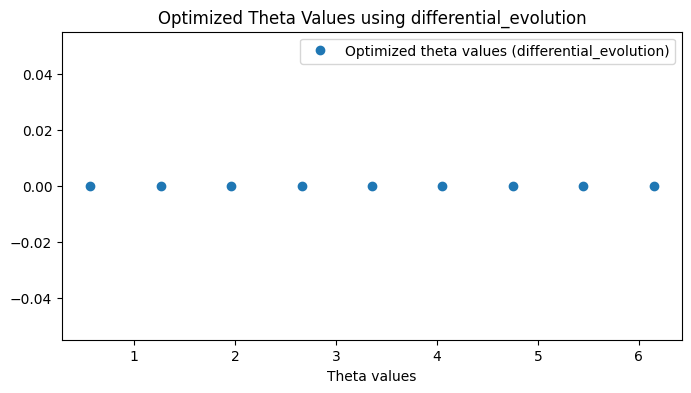

Global Solver: dual_annealing
Optimal theta values: [2.84316828 4.23943161 3.54129967 0.05064132 4.93756346 2.14503642
 1.44690498 5.63569465 0.74877332]
Minimum objective value: 6.666666651856742



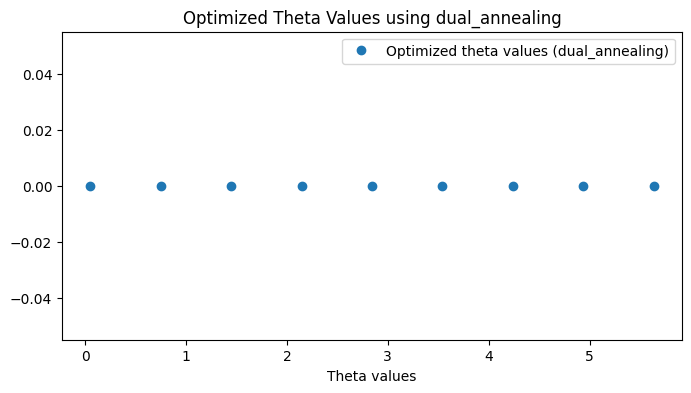

In [7]:
# 目标函数的最小化

# 设置参数
max_n =4 # 可以根据需要调整
order = 1  # 可以根据需要调整

def optimize_objective_global(max_n, order, method, bounds=None):
    if method == 'differential_evolution':
        result = differential_evolution(objective, bounds, args=(max_n,order))
    elif method == 'shgo':
        result = shgo(objective, bounds, args=(max_n,order))
    elif method == 'dual_annealing':
        result = dual_annealing(objective, bounds, args=(max_n,order))
    return result

bounds = [(0, 2 * np.pi) for _ in range(2 * max_n + 1)]

# 选择不同的全局求解器
global_solvers = ['differential_evolution', 'dual_annealing']

# 优化并输出结果
for solver in global_solvers:
    result = optimize_objective_global(max_n, order, solver, bounds=bounds)
    print(f"Global Solver: {solver}")
    print("Optimal theta values:", result.x)
    print("Minimum objective value:", result.fun)
    print()

    # 绘制优化后的 theta 值
    plt.figure(figsize=(8, 4))
    plt.plot(result.x, np.zeros_like(result.x), 'o', label=f'Optimized theta values ({solver})')
    plt.xlabel('Theta values')
    plt.legend()
    plt.title(f'Optimized Theta Values using {solver}')
    plt.show()

    # A = interp_matrix(result.x, max_n)
    # # regularization = 1e-8 * np.eye(A.shape[1])  # 添加一个小的正则化项
    # Var = np.linalg.inv(A.T @ A)
    # print(Var)


In [18]:
theta_vals = np.linspace(0, 2 * np.pi, 2*max_n+1, endpoint=False) + np.random.randn()
print(theta_vals)
objective(theta_vals, max_n, order)

[-0.51214392  0.18598778  0.88411948  1.58225118  2.28038288  2.97851459
  3.67664629  4.37477799  5.07290969]


6.666666651851852

In [ ]:
theta = np.random.rand(2*max_n+1) * 2 * np.pi

In [124]:
theta_vals = theta + np.random.randn()
print(theta_vals)
objective(theta_vals, max_n, order)

[4.88726271 1.54728828 4.59846843 2.63119136 7.07777144 1.71247749
 3.7045746  7.43293874 2.93083125]


1725.6795797172485